In [1]:
!pip install gensim nltk matplotlib scikit-learn

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   -- ------------------------------------- 1.6/24.0 MB 9.3 MB/s eta 0:00:03
   ----- ---------------------------------- 3.1/24.0 MB 7.7 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/24.0 MB 7.1 MB/s eta 0:00:03
   ---------- ----------------------------- 6.6/24.0 MB 7.9 MB/s eta 0:00:03
   ------------- -------------------------- 8.4/24.0 MB 8.3 MB/s eta 0:00:02
   -------------- ------------------------- 8.7/24.0 MB 7.9 MB/s eta 0:00:02
   --------------- ------------------------ 9.2/24.0 MB 6.4 MB/s eta 0:00:03
   --------------- ------------------------ 9.4/24.0 MB 5.8 MB/s eta 0:00:03
   --------------- ------------------------ 9.4/24.0 MB 5.8 MB/s eta 0:00:03
   ---------------- ----------------------- 9.7/24.0 MB 5.1 MB/s eta 0:00:03
   ---------------- ----------------------- 10.0/24.0 MB 4.3 MB/s eta 0:00:04
   ---------------- ----------------------- 10.0/24.0 MB 4.3 MB/s eta 0:00:04
   -

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
# Download required NLTK resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Sample text corpus
corpus = [
    "Natural Language Processing is fascinating.",
    "Word2Vec captures semantic meaning of words.",
    "Gensim makes training word embeddings easy.",
    "You can find similar words using Word2Vec.",
    "Deep learning improves NLP performance."
]

In [5]:
# Preprocess text
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

In [6]:
# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)

In [7]:
# Extract word vectors
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

In [8]:
# PCA for 2D projection
pca = PCA(n_components=2)
word_vecs_2d_pca = pca.fit_transform(word_vectors)

In [9]:
# ---- Plot the 2D vectors ----
def plot_2d_vectors(vecs, words, title='2D Word Vector Visualization'):
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        x, y = vecs[i]
        plt.scatter(x, y)
        plt.annotate(word, (x, y))
    plt.title(title)
    plt.grid(True)
    plt.show()


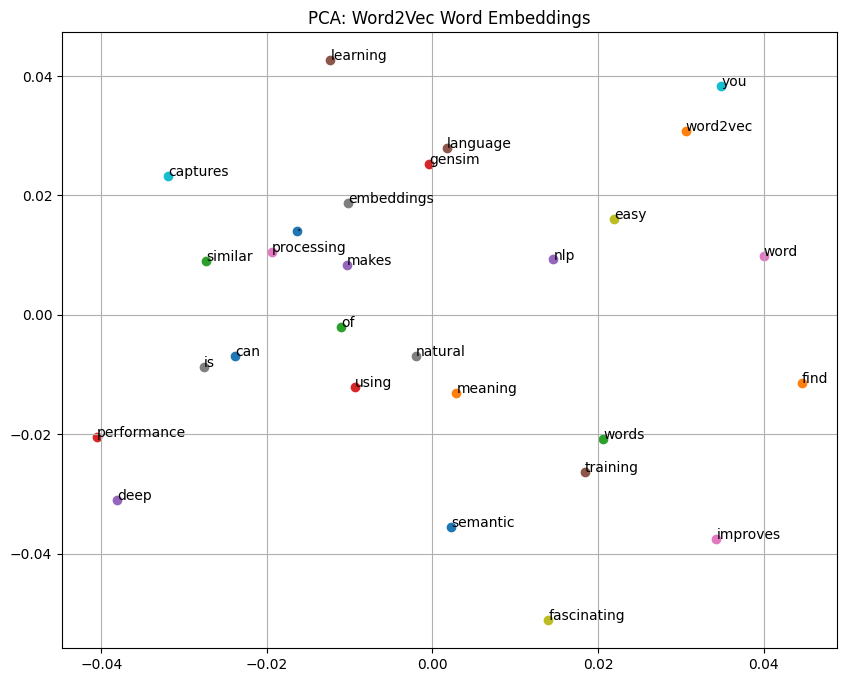

In [10]:
# Call the plot function
plot_2d_vectors(word_vecs_2d_pca, words, title='PCA: Word2Vec Word Embeddings')